# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Impor the OpenWeatherMap API key

# weather_api_key = "87d59f0a92e58e227419e9c78240ba60"


# Import citipy to determine the cities based on latitude and longitude


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
# url = # YOUR CODE HERE
url = "http://api.openweathermap.org/data/2.5/weather?"

# HEre is where you api key will  go

geoapify_key = "3d2a42459ad47e9ba0aabcd8d099f0b9"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}q={city}&appid={geoapify_key}"
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Extract required fields from the JSON data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?q=blackmans bay&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 1 of Set 1 | blackmans bay
http://api.openweathermap.org/data/2.5/weather?q=edinburgh of the seven seas&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 2 of Set 1 | edinburgh of the seven seas
http://api.openweathermap.org/data/2.5/weather?q=opuwo&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 3 of Set 1 | opuwo
http://api.openweathermap.org/data/2.5/weather?q=udachny&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 4 of Set 1 | udachny
http://api.openweathermap.org/data/2.5/weather?q=sitka&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 5 of Set 1 | sitka
http://api.openweathermap.org/data/2.5/weather?q=avarua&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 6 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?q=puerto natales&appid=3d2a42459ad47e9ba0

http://api.openweathermap.org/data/2.5/weather?q=nantucket&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 9 of Set 2 | nantucket
http://api.openweathermap.org/data/2.5/weather?q=port mathurin&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 10 of Set 2 | port mathurin
http://api.openweathermap.org/data/2.5/weather?q=ilulissat&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 11 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 12 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?q=salbris&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 13 of Set 2 | salbris
http://api.openweathermap.org/data/2.5/weather?q=fortaleza&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 14 of Set 2 | fortaleza
http://api.openweathermap.org/data/2.5/weather?q=colonia&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 15 of Set 2 | colonia
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?q=sandnessjoen&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 17 of Set 3 | sandnessjoen
http://api.openweathermap.org/data/2.5/weather?q=harper&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 18 of Set 3 | harper
http://api.openweathermap.org/data/2.5/weather?q=gebeit&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 19 of Set 3 | gebeit
http://api.openweathermap.org/data/2.5/weather?q=kangding&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 20 of Set 3 | kangding
http://api.openweathermap.org/data/2.5/weather?q=aasiaat&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 21 of Set 3 | aasiaat
http://api.openweathermap.org/data/2.5/weather?q=ta`u&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 22 of Set 3 | ta`u
http://api.openweathermap.org/data/2.5/weather?q=altai&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 23 of Set 3 | altai
http://api.openweathermap.org/data/2.5/weather?q=y

http://api.openweathermap.org/data/2.5/weather?q=beidao&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 26 of Set 4 | beidao
http://api.openweathermap.org/data/2.5/weather?q=kununurra&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 27 of Set 4 | kununurra
http://api.openweathermap.org/data/2.5/weather?q=bikenibeu village&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 28 of Set 4 | bikenibeu village
http://api.openweathermap.org/data/2.5/weather?q=rabo de peixe&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 29 of Set 4 | rabo de peixe
http://api.openweathermap.org/data/2.5/weather?q=abha&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 30 of Set 4 | abha
http://api.openweathermap.org/data/2.5/weather?q=kardla&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 31 of Set 4 | kardla
http://api.openweathermap.org/data/2.5/weather?q=walvis bay&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 32 of Set 4 | walvis bay
http://api.openw

http://api.openweathermap.org/data/2.5/weather?q=bani yas city&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 36 of Set 5 | bani yas city
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=nuuk&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 37 of Set 5 | nuuk
http://api.openweathermap.org/data/2.5/weather?q=isafjordur&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 38 of Set 5 | isafjordur
http://api.openweathermap.org/data/2.5/weather?q=bargara&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 39 of Set 5 | bargara
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=asau village&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 40 of Set 5 | asau village
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=acajutla&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 41 of Set 5 | acajutla
http://api.openweathermap.org/data/2.5/weather?q=abatskoye&appid=3d2a42459ad

http://api.openweathermap.org/data/2.5/weather?q=la malbaie&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 44 of Set 6 | la malbaie
http://api.openweathermap.org/data/2.5/weather?q=lobito&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 45 of Set 6 | lobito
http://api.openweathermap.org/data/2.5/weather?q=sanctuary point&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 46 of Set 6 | sanctuary point
http://api.openweathermap.org/data/2.5/weather?q=flekkefjord&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 47 of Set 6 | flekkefjord
http://api.openweathermap.org/data/2.5/weather?q=struer&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 48 of Set 6 | struer
http://api.openweathermap.org/data/2.5/weather?q=ust-nera&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 49 of Set 6 | ust-nera
http://api.openweathermap.org/data/2.5/weather?q=harrison&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 0 of Set 7 | harrison
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?q=ilomantsi&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 3 of Set 8 | ilomantsi
http://api.openweathermap.org/data/2.5/weather?q=aleksandrovskoye&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 4 of Set 8 | aleksandrovskoye
http://api.openweathermap.org/data/2.5/weather?q=enewetak&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 5 of Set 8 | enewetak
http://api.openweathermap.org/data/2.5/weather?q=nobres&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 6 of Set 8 | nobres
http://api.openweathermap.org/data/2.5/weather?q=newport&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 7 of Set 8 | newport
http://api.openweathermap.org/data/2.5/weather?q=bathsheba&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 8 of Set 8 | bathsheba
http://api.openweathermap.org/data/2.5/weather?q=ilo&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 9 of Set 8 | ilo
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?q=caglayancerit&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 12 of Set 9 | caglayancerit
http://api.openweathermap.org/data/2.5/weather?q=cairns city&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 13 of Set 9 | cairns city
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?q=luderitz&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 14 of Set 9 | luderitz
http://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 15 of Set 9 | fortuna
http://api.openweathermap.org/data/2.5/weather?q=ekibastuz&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 16 of Set 9 | ekibastuz
http://api.openweathermap.org/data/2.5/weather?q=key west&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 17 of Set 9 | key west
http://api.openweathermap.org/data/2.5/weather?q=aral&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 18 of Set 9 | ara

http://api.openweathermap.org/data/2.5/weather?q=santarcangelo&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 23 of Set 10 | santarcangelo
http://api.openweathermap.org/data/2.5/weather?q=barra do bugres&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 24 of Set 10 | barra do bugres
http://api.openweathermap.org/data/2.5/weather?q=chinde&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 25 of Set 10 | chinde
http://api.openweathermap.org/data/2.5/weather?q=canitas de felipe pescador&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 26 of Set 10 | canitas de felipe pescador
http://api.openweathermap.org/data/2.5/weather?q=toppenish&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 27 of Set 10 | toppenish
http://api.openweathermap.org/data/2.5/weather?q=ko samui&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 28 of Set 10 | ko samui
http://api.openweathermap.org/data/2.5/weather?q=faya-largeau&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Process

http://api.openweathermap.org/data/2.5/weather?q=buta&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 33 of Set 11 | buta
http://api.openweathermap.org/data/2.5/weather?q=port moresby&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 34 of Set 11 | port moresby
http://api.openweathermap.org/data/2.5/weather?q=petrovsk&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 35 of Set 11 | petrovsk
http://api.openweathermap.org/data/2.5/weather?q=souillac&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 36 of Set 11 | souillac
http://api.openweathermap.org/data/2.5/weather?q=markala&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 37 of Set 11 | markala
http://api.openweathermap.org/data/2.5/weather?q=rajaori&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 38 of Set 11 | rajaori
http://api.openweathermap.org/data/2.5/weather?q=oral&appid=3d2a42459ad47e9ba0aabcd8d099f0b9
Processing Record 39 of Set 11 | oral
http://api.openweathermap.org/data/2.5/

In [5]:
city_weather

{'coord': {'lon': -10.7969, 'lat': 6.3005},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 299.02,
  'feels_like': 299.91,
  'temp_min': 299.02,
  'temp_max': 299.02,
  'pressure': 1011,
  'humidity': 86,
  'sea_level': 1011,
  'grnd_level': 1008},
 'visibility': 10000,
 'wind': {'speed': 3.01, 'deg': 235, 'gust': 4.04},
 'rain': {'1h': 0.24},
 'clouds': {'all': 12},
 'dt': 1696444878,
 'sys': {'type': 1,
  'id': 2389,
  'country': 'LR',
  'sunrise': 1696401027,
  'sunset': 1696444404},
 'timezone': 0,
 'id': 2274895,
 'name': 'Monrovia',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,282.22,85,79,4.55,AU,1696444813
1,edinburgh of the seven seas,-37.0676,-12.3116,283.95,67,81,4.98,SH,1696444813
2,opuwo,-18.0607,13.8400,301.45,17,1,4.13,NA,1696444813
3,udachny,66.4167,112.4000,271.18,92,100,11.29,RU,1696444813
4,sitka,57.0531,-135.3300,284.09,76,75,1.54,US,1696444813


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,282.22,85,79,4.55,AU,1696444813
1,edinburgh of the seven seas,-37.0676,-12.3116,283.95,67,81,4.98,SH,1696444813
2,opuwo,-18.0607,13.8400,301.45,17,1,4.13,NaN,1696444813
3,udachny,66.4167,112.4000,271.18,92,100,11.29,RU,1696444813
4,sitka,57.0531,-135.3300,284.09,76,75,1.54,US,1696444813


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

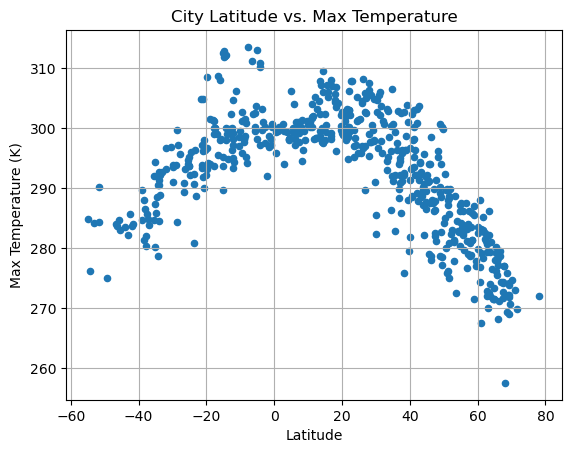

In [10]:

# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Max Temp')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

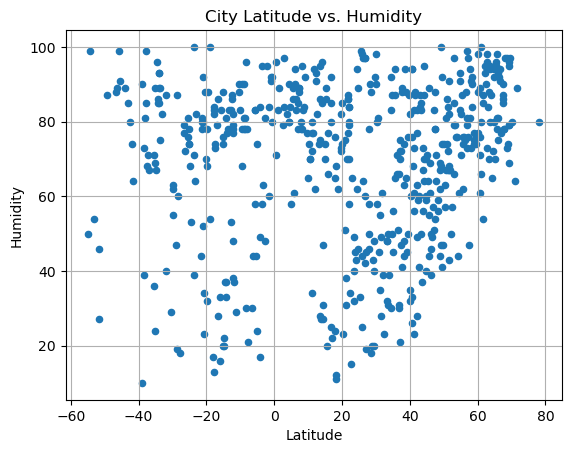

In [11]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Humidity')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

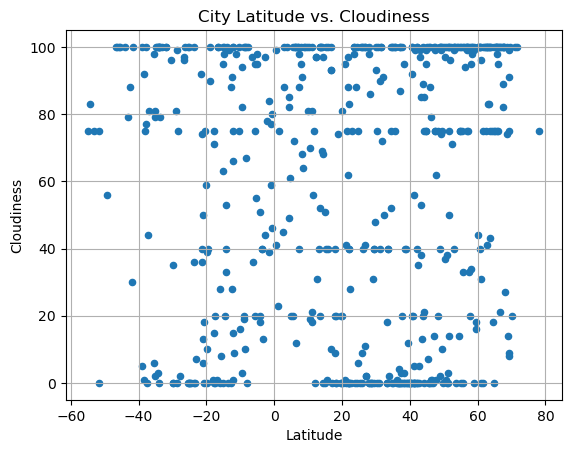

In [12]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot.scatter(x='Lat', y='Cloudiness')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

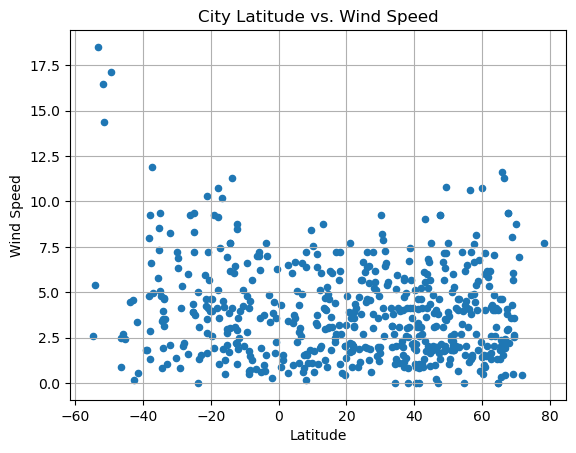

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

city_data_df.plot.scatter(x='Lat', y='Wind Speed')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
from scipy.stats import linregress


# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(x_values, y_values, title, x_label, y_label):


    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Create equation of line to calculate predicted values
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    # Create plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.annotate(line_eq, (10, 270), fontsize=12, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Show the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,udachny,66.4167,112.4000,271.18,92,100,11.29,RU,1696444813
4,sitka,57.0531,-135.3300,284.09,76,75,1.54,US,1696444813
9,anadyr,64.7500,177.4833,273.43,80,0,4.00,RU,1696444814
11,uludere,37.4450,42.8617,285.95,72,3,1.39,TR,1696444814
12,pudasjarvi,65.3833,26.9167,279.19,96,100,1.34,FI,1696444814


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,282.22,85,79,4.55,AU,1696444813
1,edinburgh of the seven seas,-37.0676,-12.3116,283.95,67,81,4.98,SH,1696444813
2,opuwo,-18.0607,13.8400,301.45,17,1,4.13,NaN,1696444813
5,avarua,-21.2078,-159.7750,297.18,78,40,10.29,CK,1696444813
6,puerto natales,-51.7236,-72.4875,284.40,46,75,16.46,CL,1696444521


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.834669075909434


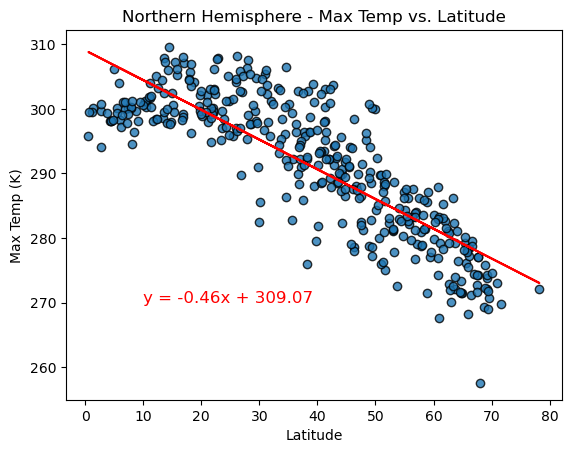

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Northern Hemisphere - Max Temp vs. Latitude", "Latitude", "Max Temp (K)")


The r-value is: 0.7519135267151067


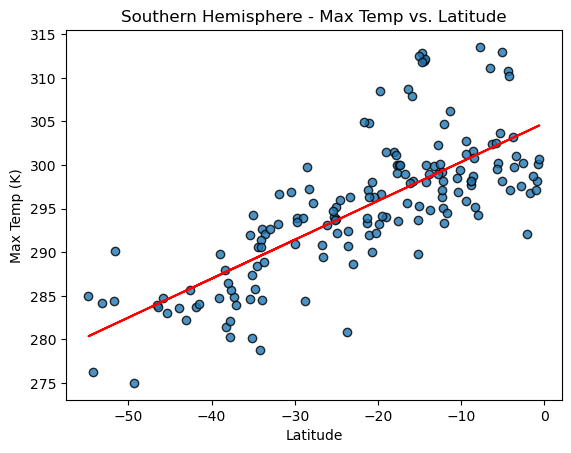

In [18]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE


plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Southern Hemisphere - Max Temp vs. Latitude", "Latitude", "Max Temp (K)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18534490466156428


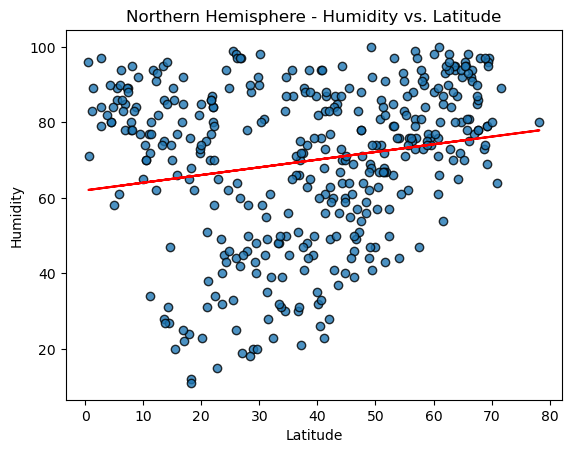

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Northern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity")


The r-value is: -0.07031327755235334


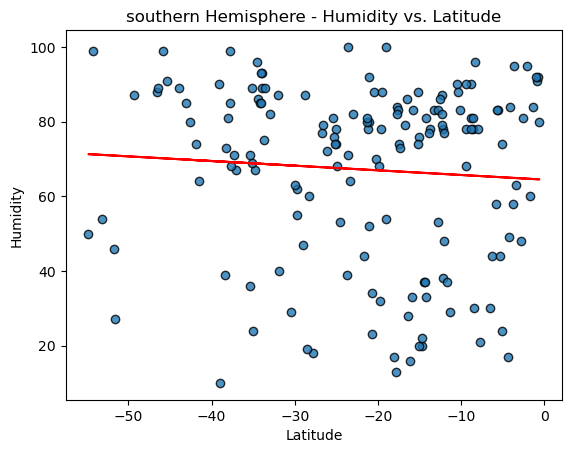

In [20]:
# Southern Hemisphere
# YOUR CODE HERE


plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "southern Hemisphere - Humidity vs. Latitude", "Latitude", "Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12874033016192965


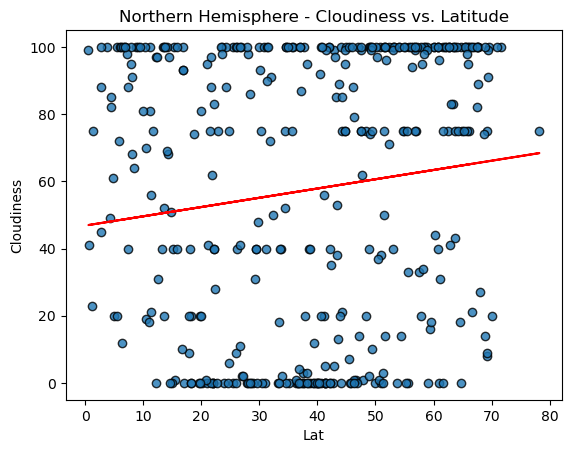

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Northern Hemisphere - Cloudiness vs. Latitude", "Lat", "Cloudiness")


The r-value is: -0.12011922804271888


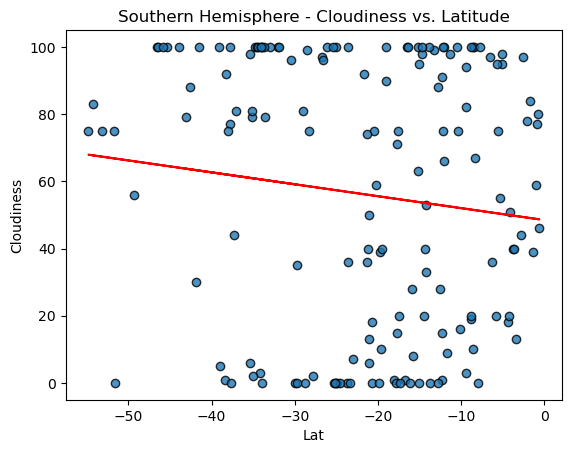

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Southern Hemisphere - Cloudiness vs. Latitude", "Lat", "Cloudiness")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06524080326490533


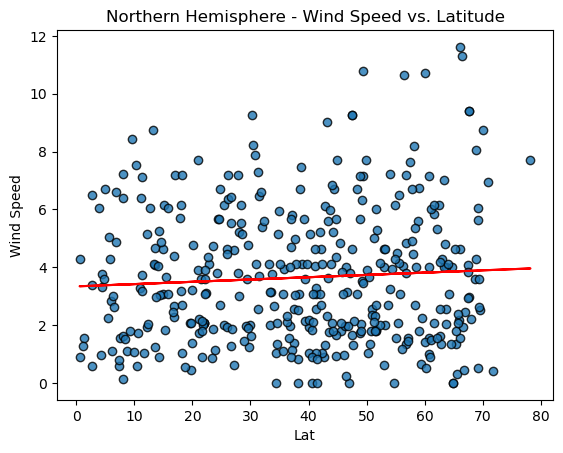

In [23]:
# Northern Hemisphere
# YOUR CODE HERE

# Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Northern Hemisphere - Wind Speed vs. Latitude", "Lat", "Wind Speed")


The r-value is: -0.24658577285199001


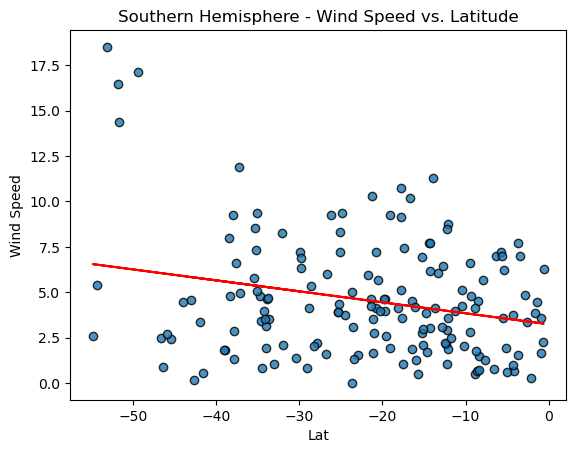

In [24]:
# Southern Hemisphere
# YOUR CODE HERE

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Southern Hemisphere - Wind Speed vs. Latitude", "Lat", "Wind Speed")


**Discussion about the linear relationship:** YOUR RESPONSE HERE